In [18]:
from __future__ import print_function

import numpy as np
import pandas as pd
import collections
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from matplotlib import pyplot as plt
import sklearn
import sklearn.manifold
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.logging.set_verbosity(tf.logging.ERROR)

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


In [44]:
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
print("Imported seaborn libraries!")

Imported seaborn libraries!


Firstly, I converted my data files from .dat to .csv format. I did this via excel using the data tab and it's "get external data" option and extracted it from text. All the delimiting was done by default and I had my files in a delimited format.

In [4]:
df = pd.read_csv("data/hetrec2011-lastfm-2k/artists.csv")
df

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...
...,...,...,...,...
17627,18741,Diamanda GalÃ¡s,http://www.last.fm/music/Diamanda+Gal%C3%A1s,http://userserve-ak.last.fm/serve/252/16352971...
17628,18742,Aya RL,http://www.last.fm/music/Aya+RL,http://userserve-ak.last.fm/serve/252/207445.jpg
17629,18743,Coptic Rain,http://www.last.fm/music/Coptic+Rain,http://userserve-ak.last.fm/serve/252/344868.jpg
17630,18744,Oz Alchemist,http://www.last.fm/music/Oz+Alchemist,http://userserve-ak.last.fm/serve/252/29297695...


There appears to be some unclean names such as "Diamanda GalÃ¡s" among others just taking an initial look at the data here.

In [5]:
df1 = pd.read_csv("data/hetrec2011-lastfm-2k/tags.csv")
df1

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal
...,...,...
11941,12644,suomi
11942,12645,symbiosis
11943,12646,sverige
11944,12647,eire


In [6]:
df2 = pd.read_csv("data/hetrec2011-lastfm-2k/user_artists.csv")
df2

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [7]:
df3 = pd.read_csv("data/hetrec2011-lastfm-2k/user_friends.csv")
df3

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831
...,...,...
25429,2099,1801
25430,2099,2006
25431,2099,2016
25432,2100,586


In [8]:
df4 = pd.read_csv("data/hetrec2011-lastfm-2k/user_taggedartists-timestamps.csv")
df4

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009
...,...,...,...,...,...,...
186474,2100,16437,4,1,7,2010
186475,2100,16437,292,1,5,2010
186476,2100,16437,2087,1,7,2010
186477,2100,16437,2801,1,5,2010


In [10]:
df5 = pd.read_csv("data/hetrec2011-lastfm-2k/user_taggedartists.csv")
df5

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009
...,...,...,...,...,...,...
186474,2100,16437,4,1,7,2010
186475,2100,16437,292,1,5,2010
186476,2100,16437,2087,1,7,2010
186477,2100,16437,2801,1,5,2010


Our last two dataframes seem exactly the same. Let's check this before we delete anything.

In [ ]:
def checkequality(A, B):

    df11 = A.sort_index(axis=1)
    df11 = df11.sort_values(df11.columns.tolist()).reset_index(drop=True)

    df22 = B.sort_index(axis=1)
    df22 = df22.sort_values(df22.columns.tolist()).reset_index(drop=True)
    return (df11 == df22).values.all()

a = checkequality(df4, df5)
print (a)

Two of our files are exactly the same. We can delete one of these accordingly.

In [ ]:
del df5

In [13]:
df.info

<bound method DataFrame.info of           id               name                                           url  \
0          1       MALICE MIZER         http://www.last.fm/music/MALICE+MIZER   
1          2    Diary of Dreams      http://www.last.fm/music/Diary+of+Dreams   
2          3  Carpathian Forest    http://www.last.fm/music/Carpathian+Forest   
3          4       Moi dix Mois         http://www.last.fm/music/Moi+dix+Mois   
4          5        Bella Morte          http://www.last.fm/music/Bella+Morte   
...      ...                ...                                           ...   
17627  18741    Diamanda GalÃ¡s  http://www.last.fm/music/Diamanda+Gal%C3%A1s   
17628  18742             Aya RL               http://www.last.fm/music/Aya+RL   
17629  18743        Coptic Rain          http://www.last.fm/music/Coptic+Rain   
17630  18744       Oz Alchemist         http://www.last.fm/music/Oz+Alchemist   
17631  18745   Grzegorz Tomczak     http://www.last.fm/music/Grzegorz+Tomczak

# Methodology
Now that all our data files are read in and in the appropriate format we will begin our end to end process. These are as follows:
##### 1. Data cleaning and processing
##### 2. Visualization
##### 3. Fitting our Model
##### 4. Evaluating our Model

# Cleaning and Processing

### Initial analysis and cleaning

In [14]:
df['name'].value_counts()

Yuridia                                1
Visa                                   1
Popof                                  1
Ð‘Ð°Ñ€Ð±Ð¸Ñ‚ÑƒÑ€Ð½Ñ‹Ð¹                 1
Bandas GaÃºchas -  www.DownsMtv.com    1
                                      ..
Fantasia                               1
Quella Mezza Sporca Dozzina            1
Nickel Creek                           1
Mason Jennings                         1
Japandroids                            1
Name: name, Length: 17632, dtype: int64

In [16]:
df1['tagID'].value_counts()

2049     1
10904    1
653      1
6798     1
4751     1
        ..
7505     1
1362     1
3411     1
9558     1
2047     1
Name: tagID, Length: 11946, dtype: int64

After initial observation, I feel the timestamp dataframe is of little use to me and hence disregard it. As per the readme file we have 1892 users and 17632 artists in our data.

In [23]:
dfs = [df, df1, df2, df3, df5]
na = []
for i in range(len(dfs)):
    if dfs[i].isnull().values.any() > 0:
        na.append(dfs[i])

In [24]:
na

[          id               name                                           url  \
 0          1       MALICE MIZER         http://www.last.fm/music/MALICE+MIZER   
 1          2    Diary of Dreams      http://www.last.fm/music/Diary+of+Dreams   
 2          3  Carpathian Forest    http://www.last.fm/music/Carpathian+Forest   
 3          4       Moi dix Mois         http://www.last.fm/music/Moi+dix+Mois   
 4          5        Bella Morte          http://www.last.fm/music/Bella+Morte   
 ...      ...                ...                                           ...   
 17627  18741    Diamanda GalÃ¡s  http://www.last.fm/music/Diamanda+Gal%C3%A1s   
 17628  18742             Aya RL               http://www.last.fm/music/Aya+RL   
 17629  18743        Coptic Rain          http://www.last.fm/music/Coptic+Rain   
 17630  18744       Oz Alchemist         http://www.last.fm/music/Oz+Alchemist   
 17631  18745   Grzegorz Tomczak     http://www.last.fm/music/Grzegorz+Tomczak   
 
              

The only dataframe with nulls is our artists dataframe. Let's investigate this further to see if there is any important missing values such as ID's etc.

In [26]:
df.dtypes

id             int64
name          object
url           object
pictureURL    object
dtype: object

In [30]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]

for feature in features_with_na: 
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')
    print(features_with_na)

pictureURL 0.0252 % missing values
['pictureURL']


This is a positive result as there are very few null values in the dataframe and the small amount that exist are in a column of lesser important that we will not need to impute missing values for.

In [35]:
played = pd.merge(df, df2, how="inner", left_on="id", right_on="artistID")
played.rename(columns={"weight": "played"}, inplace=True)

In [36]:
played

,id,name,url,pictureURL,userID,artistID,played
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,34,1,212
1,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,274,1,483
2,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,785,1,76
3,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,135,2,1021
4,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,257,2,152
...,...,...,...,...,...,...,...
92829,18741,Diamanda GalÃ¡s,http://www.last.fm/music/Diamanda+Gal%C3%A1s,http://userserve-ak.last.fm/serve/252/16352971...,454,18741,301
92830,18742,Aya RL,http://www.last.fm/music/Aya+RL,http://userserve-ak.last.fm/serve/252/207445.jpg,454,18742,294
92831,18743,Coptic Rain,http://www.last.fm/music/Coptic+Rain,http://userserve-ak.last.fm/serve/252/344868.jpg,454,18743,287
92832,18744,Oz Alchemist,http://www.last.fm/music/Oz+Alchemist,http://userserve-ak.last.fm/serve/252/29297695...,454,18744,286


We will drop the pictureURL column as there is not much information to be gained and there is some nulls present.

In [37]:
played.drop(columns=['pictureURL'], inplace=True)

In [38]:
played

,id,name,url,userID,artistID,played
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,34,1,212
1,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,274,1,483
2,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,785,1,76
3,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,135,2,1021
4,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,257,2,152
...,...,...,...,...,...,...
92829,18741,Diamanda GalÃ¡s,http://www.last.fm/music/Diamanda+Gal%C3%A1s,454,18741,301
92830,18742,Aya RL,http://www.last.fm/music/Aya+RL,454,18742,294
92831,18743,Coptic Rain,http://www.last.fm/music/Coptic+Rain,454,18743,287
92832,18744,Oz Alchemist,http://www.last.fm/music/Oz+Alchemist,454,18744,286


In [144]:
mean = played['played'].mean()
print("The mean number of times a user listens to a song is: " + str(mean))

The mean number of times a user listens to a song is: 745.2439300256372


In [145]:
median = played['played'].median()
print("The median number of times a user listens to a song is: " + str(median))

The median number of times a user listens to a song is: 260.0


<AxesSubplot:>

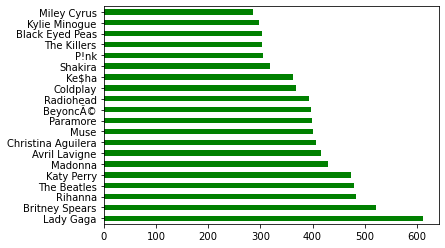

In [39]:
played['name'].value_counts()[:20].plot(kind='barh', color='green')

<AxesSubplot:xlabel='played'>

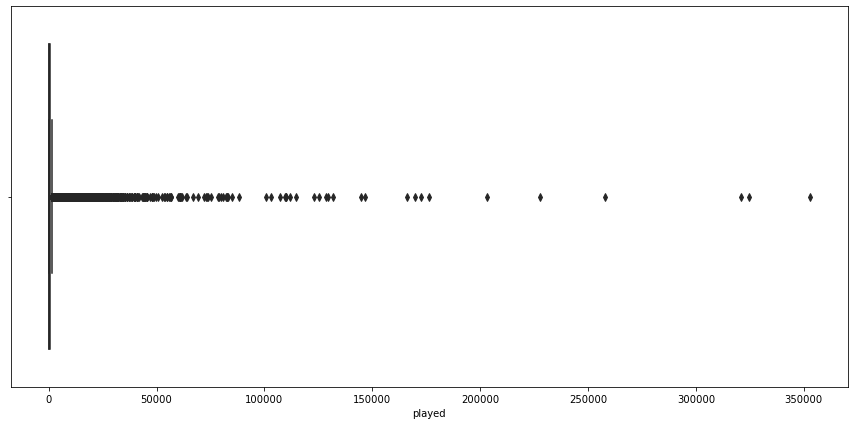

In [126]:
plt.figure(figsize=[15,7])
sns.boxplot(x=played['played'], color=".25")

There appears to be quite a lot of outliers here in the played column. Some users have obviously listened to their songs far more times than the average. We will check the mean and median to be sure.

In [68]:
played.describe()

,id,userID,artistID,played
count,92834.000000,92834.000000,92834.000000,92834.00000
mean,3331.123145,1037.010481,3331.123145,745.24393
std,4383.590502,610.870436,4383.590502,3751.32208
min,1.000000,2.000000,1.000000,1.00000
25%,436.000000,502.000000,436.000000,107.00000
50%,1246.000000,1029.000000,1246.000000,260.00000
75%,4350.000000,1568.000000,4350.000000,614.00000
max,18745.000000,2100.000000,18745.000000,352698.00000


In [69]:
played.describe(include=[np.object])

<ipython-input-69-1861b8911a57>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  played.describe(include=[np.object])


,name,url
count,92834,92834
unique,17632,17632
top,Lady Gaga,http://www.last.fm/music/Lady+Gaga
freq,611,611


In [127]:
grouped_multiple = played.groupby(['artistID', 'name']).agg({'played': ['mean', 'median', 'max', 'sum']})
grouped_multiple.columns = ['mean', 'med', 'max', 'sum']
grouped_multiple = grouped_multiple.reset_index()
#grouped_multiple.sort('price_mean', ascending=False)
grouped_multiple = pd.DataFrame(grouped_multiple)

In [128]:
artdf = grouped_multiple.sort_values(by=['sum'], ascending=False)

In [129]:
artdf

,artistID,name,mean,med,max,sum
283,289,Britney Spears,4584.559387,1000.5,131733,2393140
66,72,Depeche Mode,4614.567376,567.0,352698,1301308
83,89,Lady Gaga,2113.563011,590.0,114672,1291387
286,292,Christina Aguilera,2600.503686,739.0,176133,1058405
492,498,Paramore,2414.659148,417.0,227829,963449
...,...,...,...,...,...,...
16522,17468,K-Precise,1.000000,1.0,1,1
13713,14309,ZÃœNDER,1.000000,1.0,1,1
13712,14308,Evil Masquerade,1.000000,1.0,1,1
16239,17168,Gosling,1.000000,1.0,1,1


In [130]:
pt2 = artdf.head(20)

<AxesSubplot:title={'center':'Biggest artists by no of listens'}, xlabel='Artist', ylabel='Listens (millions)'>

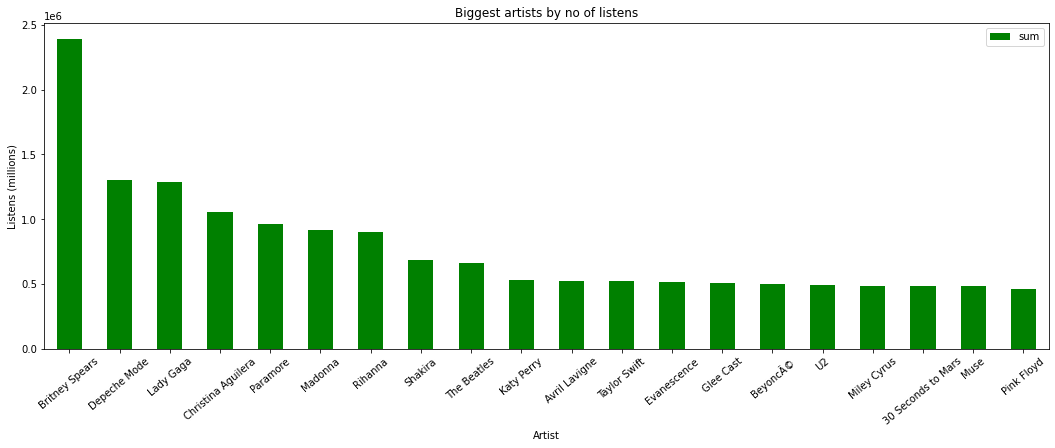

In [131]:
pt2.plot.bar(x = 'name', y = 'sum', rot = 40, figsize=(18, 6), color='green', xlabel='Artist', ylabel='Listens (millions)', title='Biggest artists by no of listens')

In [132]:
grouped_multiple = played.groupby(['userID']).agg({'played': ['mean', 'median', 'max', 'sum']})
grouped_multiple.columns = ['mean', 'med', 'max', 'sum']
grouped_multiple = grouped_multiple.reset_index()
#grouped_multiple.sort('price_mean', ascending=False)
grouped_multiple = pd.DataFrame(grouped_multiple)

In [133]:
userdf = grouped_multiple.sort_values(by=['sum'], ascending=False)

In [134]:
pt3 = userdf.head(20)

<AxesSubplot:title={'center':'Users with by no of listens'}, xlabel='User', ylabel='Listens (millions)'>

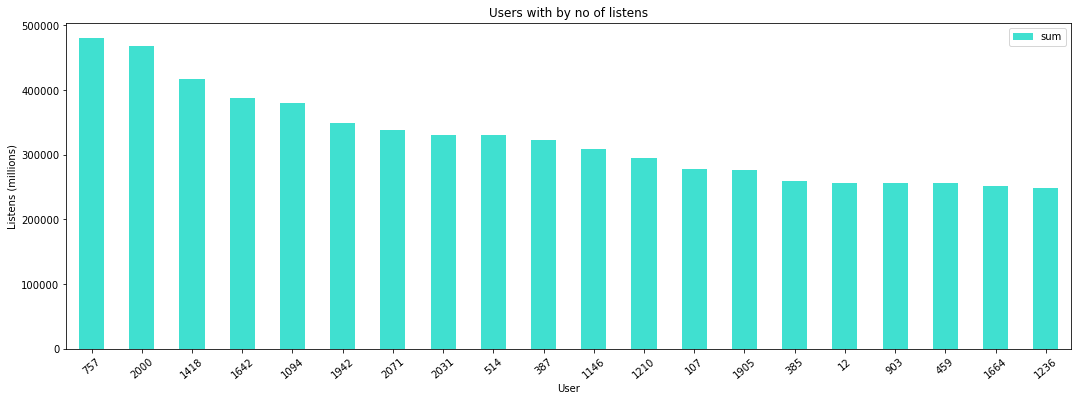

In [135]:
pt3.plot.bar(x = 'userID', y = 'sum', rot = 40, figsize=(18, 6), color='turquoise', xlabel='User', ylabel='Listens (millions)', title='Users with by no of listens')

In [168]:
artdf['mean']

283      4584.559387
66       4614.567376
83       2113.563011
286      2600.503686
492      2414.659148
            ...     
16522       1.000000
13713       1.000000
13712       1.000000
16239       1.000000
16241       1.000000
Name: mean, Length: 17632, dtype: float64

In [170]:
played.shape

(92834, 6)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

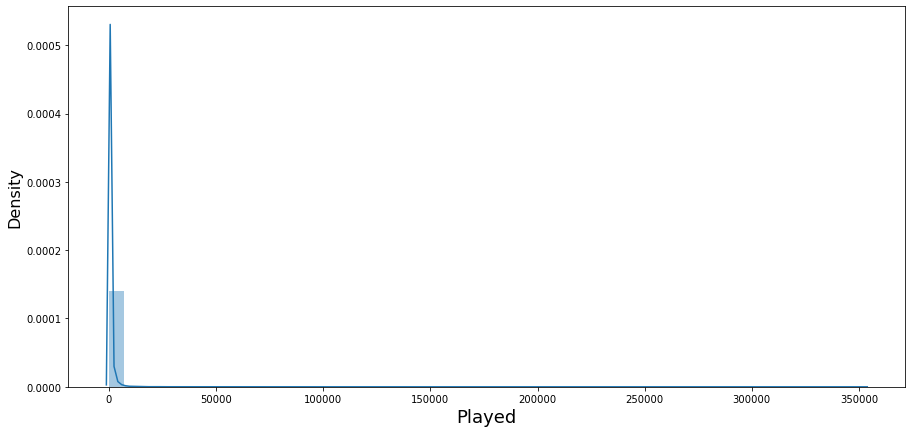

In [175]:
plt.figure(figsize=[15,7])
sns.distplot(played['played'])
plt.xlabel('Played', fontsize=18)
plt.ylabel('Density', fontsize=16)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='played', ylabel='Density'>

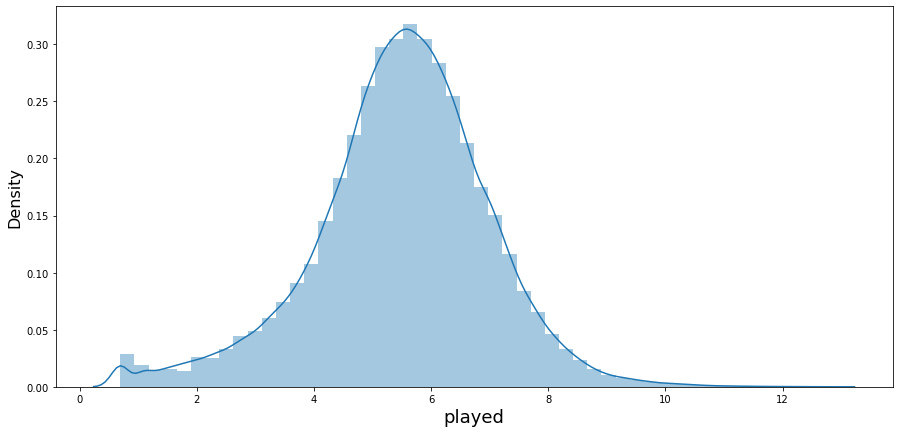

In [180]:
plt.figure(figsize=[15,7])
plt.xlabel('L(played)', fontsize=18)
plt.ylabel('Density', fontsize=16)
sns.distplot(np.log1p(played["played"]))

In [186]:
val = played['name'].value_counts()
total = played['userID'].nunique()
percent = []
for i in range(len(val)):
    y = val[i] / total
    percent.append(y)
    #print(y)

In [193]:
percent = np.array(percent)
artdf['Percentage'] = percent.tolist()

In [194]:
artdf

,artistID,name,mean,med,max,sum,Percentage
283,289,Britney Spears,4584.559387,1000.5,131733,2393140,0.322939
66,72,Depeche Mode,4614.567376,567.0,352698,1301308,0.275899
83,89,Lady Gaga,2113.563011,590.0,114672,1291387,0.255814
286,292,Christina Aguilera,2600.503686,739.0,176133,1058405,0.253700
492,498,Paramore,2414.659148,417.0,227829,963449,0.250000
...,...,...,...,...,...,...,...
16522,17468,K-Precise,1.000000,1.0,1,1,0.000529
13713,14309,ZÃœNDER,1.000000,1.0,1,1,0.000529
13712,14308,Evil Masquerade,1.000000,1.0,1,1,0.000529
16239,17168,Gosling,1.000000,1.0,1,1,0.000529


<AxesSubplot:title={'center':'Percentage of users who listen to most popular artists'}, xlabel='Artist', ylabel='% of unique users who listen'>

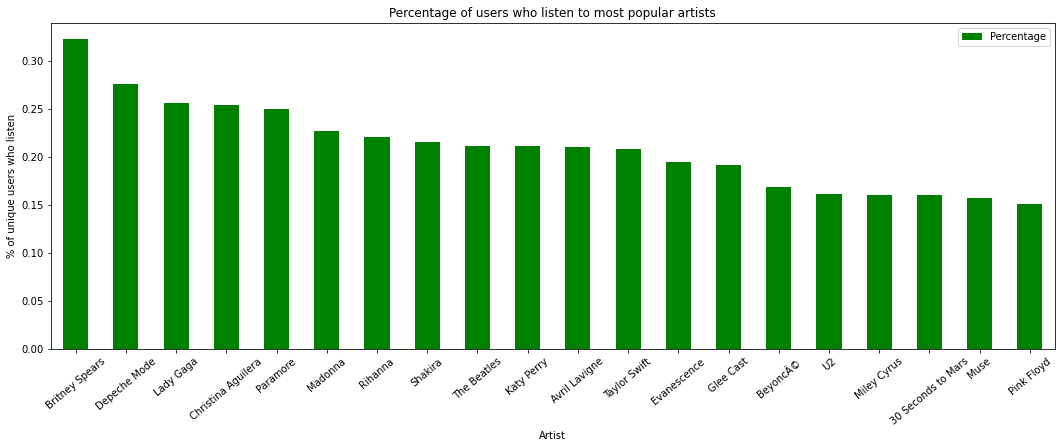

In [198]:
pt2 = artdf.head(20)
pt2.plot.bar(x = 'name', y = 'Percentage', rot = 40, figsize=(18, 6), color='green', xlabel='Artist', ylabel='% of unique users who listen', title='Percentage of users who listen to most popular artists')